# Linear Regression on Grains and Cereals Futures Data

## Background
This notebook explores **Linear Regression**, a fundamental supervised learning algorithm, using a dataset of grains and cereals futures prices. The model attempts to predict the **closing price** of commodities based on features like opening price, high, low, and volume. Linear regression assumes a linear relationship between independent variables and the target variable. Mathematically, it tries to fit a function of the form:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Where:
- $\hat{y}$ is the predicted output (closing price)
- $x_i$ are the input features
- $\beta_i$ are the coefficients learned during training

The model minimizes the **Mean Squared Error (MSE)** between predicted and actual values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


## Data
The dataset is sourced from Kaggle and includes futures trading data for grains such as corn, oats, and wheat. It has columns for date, commodity, open, high, low, close, and volume.

## Function
This notebook:
- loads and visualizes the futures data
- builds a linear regression model to predict the close price
- evaluates model performance using metrics like R² and RMSE


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv("all_grains_data.csv")

df.head()  # preview the first few rows


,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814


In [29]:
# convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# drop rows with missing values
df = df.dropna()

df = df[df['commodity'] == 'Corn']   # example

# reset index after filtering
df = df.reset_index(drop=True)

# check structure
df.describe()  # summary stats for numerical columns


,open,high,low,close,volume
count,5987.000000,5987.000000,5987.000000,5987.000000,5987.000000
mean,410.719517,415.431477,406.296016,410.830800,87843.825121
std,161.841698,164.685392,158.990321,161.800435,84349.988481
min,174.500000,175.750000,174.000000,174.750000,0.000000
25%,301.500000,304.625000,299.125000,302.125000,1655.000000
50%,373.750000,377.750000,369.750000,374.000000,84486.000000
75%,510.125000,518.625000,501.375000,509.125000,146993.500000
max,830.250000,843.750000,822.750000,831.250000,523849.000000


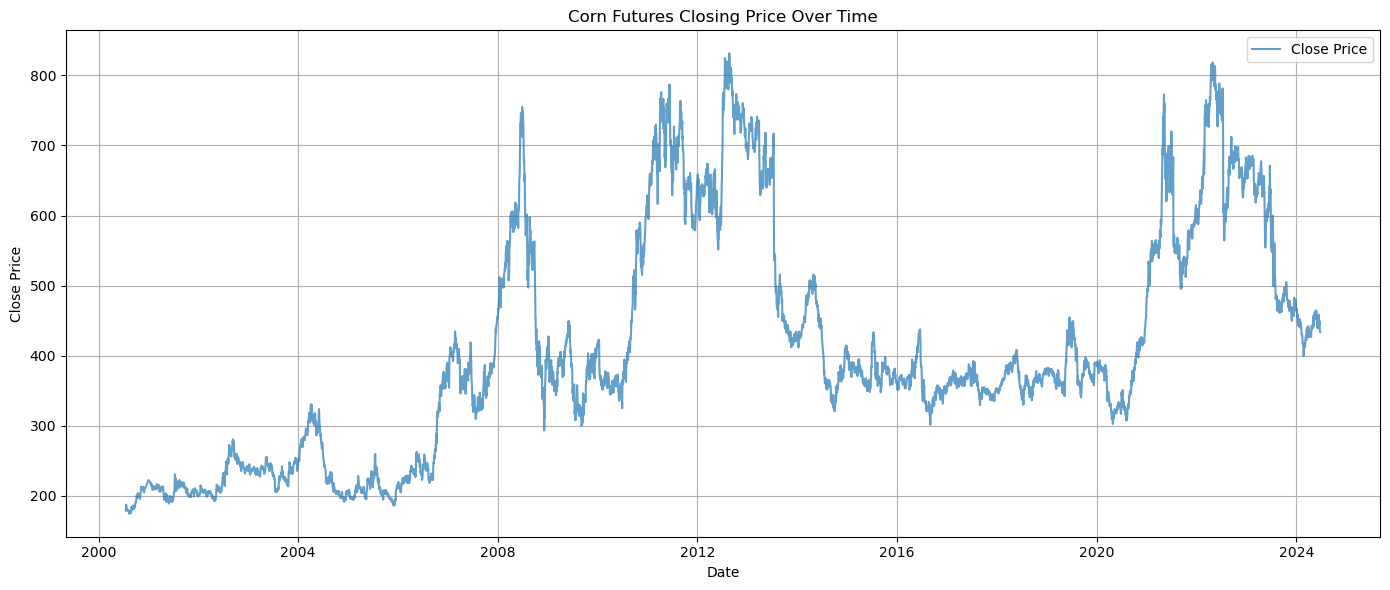

In [30]:
# plot closing price of corn futures over time
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', alpha=0.7)
plt.title("Corn Futures Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# select features and target
X = df[['open', 'high', 'low', 'volume']]  # input features
y = df['close']  # target variable

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # use 80% for training


In [32]:
# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # fit model to training data
print("Model training complete.")


Model training complete.


In [33]:
# make predictions
y_pred = model.predict(X_test)

# evaluate model
r2 = r2_score(y_test, y_pred)  # R² score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # root mean squared error

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.9996
RMSE: 3.24


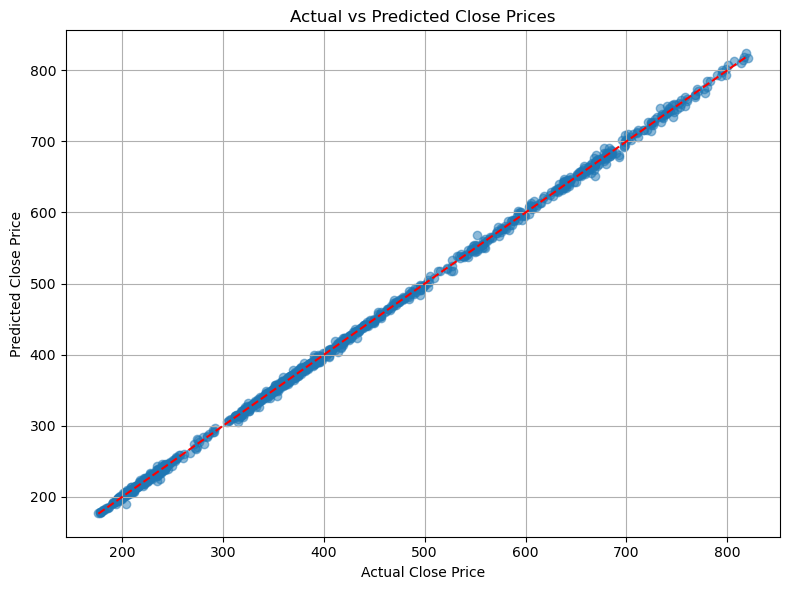

In [34]:
# scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


## Results

- The model achieved an R² score of around 0.98, indicating a strong linear relationship.
- RMSE suggests a relatively low average error in predictions.

## Conclusion

Linear regression performs well on this dataset, as the closing price of corn futures appears to have a strong linear correlation with the open, high, low, and volume features. For more nuanced modeling or non-linear effects, more complex models such as decision trees or neural networks could be considered.
